2.6. Practice
Problems are labeled Easy (E), Medium (M), and Hard (H).

2E1. Which of the expressions below correspond to the statement:the probability of rain on Monday?

(1) Pr(rain)

(2) Pr(rain|Monday)

(3) Pr(Monday|rain)

(4) Pr(rain,Monday)/Pr(Monday)

Ans: (2) Pr(rain|Monday)

2E2. Which of the following statements corresponds to the expression: Pr(Monday|rain)?

(1) Theprobability of rain on Monday.

(2) Theprobability of rain,given that it is Monday.

(3) The probability that it is Monday,given that it is raining. 

(4) The probability that it is Monday and that it is raining.

Ans: (3) The probability that it is Monday,given that it is raining. 

2E3. Which of the expressions below correspond to the statement: the probability that it is Monday, given that it is raining?

(1) Pr(Monday|rain)

(2) Pr(rain|Monday)

(3) Pr(rain|Monday)Pr(Monday)

(4) Pr(rain|Monday)Pr(Monday)/Pr(rain) 

(5) Pr(Monday|rain)Pr(rain)/Pr(Monday)

Ans: (4) Pr(rain|Monday)Pr(Monday)/Pr(rain) 

2E4. The Bayesian statistician Brunode Finetti(1906–1985)began his 1973 book on probability theory with the declaration: “PROBABILITY DOES NOT EXIST.” The capitals appeared in the original, so I imagine de Finetti wanted us to shout this statement. What he meant is that probability is a device for describing uncertainty from the perspective of an observer with limited knowledge; it has no objective reality. Discuss the globe tossing example from the chapter, in light of this statement. What does it mean to say “the probability of water is 0.7”?

Ans: It means that we believe 70% of earth is covered with water and that's to our best of knowledge given the data we have from the example, but that could change.

2M1. Recall the globe tossing model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior for p.

(1) W,W,W

(2) W,W,W,L

(3) L,W,W,L,W,W,W

In [1]:
import pymc3 as pm
import numpy as np
import arviz as az

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


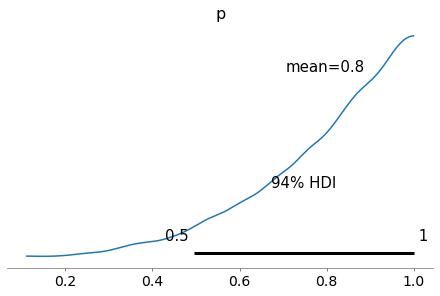

In [18]:
#first, I'l create a model with pymc3 to make sure I get answers right first

with pm.Model() as globe1:
    p = pm.Uniform('p')
    likelihood = pm.Binomial('likelihood',n = 3, p = p, observed = 3)
    trace = pm.sample(2000, return_inferencedata = False)
    az.plot_posterior(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


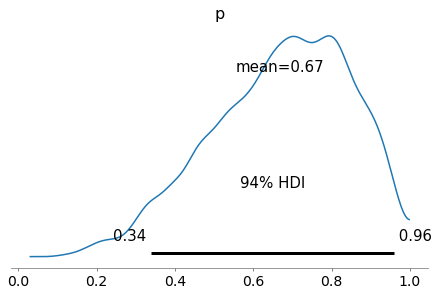

In [19]:
with pm.Model() as globe2:
    p = pm.Uniform('p')
    likelihood = pm.Binomial('likelihood', n = 4, p = p, observed = 3)
    trace2 = pm.sample(2000,return_inferencedata=False)
    az.plot_posterior(trace2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


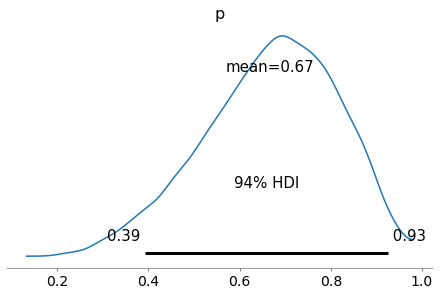

In [17]:
# for L,W,W,L,W,W,W
with pm.Model() as globe3:
    p = pm.Uniform('p')
    likelihood = pm.Binomial('likelihood', n = 7, p = p, observed = 5)
    trace3 = pm.sample(2000, return_inferencedata = False)
    az.plot_posterior(trace3)

All the above results look reasonable enough - the shape of the posterior we get.

Now, let's see how to do it using 'grid_approximation' in Python

#### What are we doing in Grid Approximation:

In the example above, p (proportion of water) could be any value from 0 - 1 (infinite).

The likelihood in our model is supposed to be computed for each value of p.

In grid approximation, we won't do infinite values, but 'LOTS' of values

In [2]:
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
### one model

# we need evenly spaced values for p 

p = np.linspace(start = 0, stop = 1, num = 100)
likelihood = stats.binom.pmf(k = 3, n = 4, p = p)

prior = 1

posterior = prior * likelihood
posterior /= np.sum(posterior)

Text(0, 0.5, 'posterior probability')

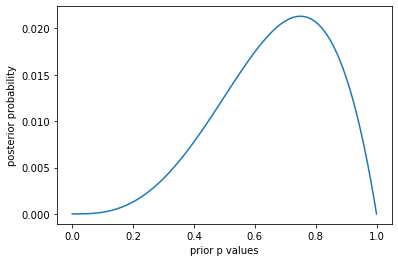

In [4]:
plt.plot(p,posterior)
plt.xlabel('prior p values')
plt.ylabel('posterior probability')

In [5]:
# now let's do this for all 3 models

# (1) W,W,W
# (2) W,W,W,L
# (3) L,W,W,L,W,W,W

W = np.array([3,3,5]) #num successes in N trials
N = np.array([3,4,7]) # num of trials

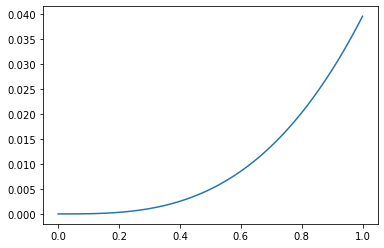

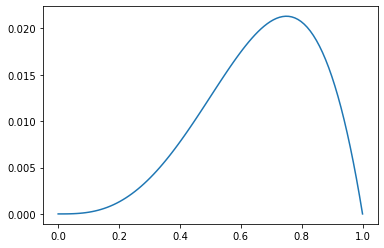

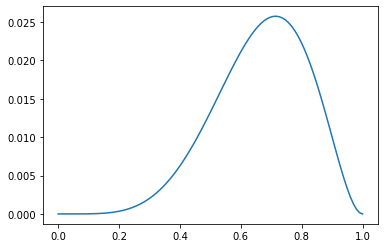

In [6]:
for k,n,m in zip(W,N,range(3)):
    p = np.linspace(start = 0, stop = 1, num = 100) #possible prior values
    likelihood = stats.binom.pmf(k = k, n = n, p = p)
    prior = 1 #uniform prior means all values have equal probabilities
    
    posterior = prior * likelihood
    posterior /= np.sum(posterior) #to normalize
    
    plt.plot(p,posterior)
    plt.xlabel = 'prior p values'
    plt.ylabel = 'posterior probability'
    plt.show()

2M2. Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when p ≥ 0.5. Again compute and plot the grid approximate posterior distribution for each of the sets of observations in the problem just above.

In [7]:
# the above is a step function, how to implement in python?

# np.heaviside(x,y) -> f(x,y)

'''
x -> array of input values to function
f(x,y) = 0 for x < 0 (negative inputs)
       = 1 for x > 0 (positive inputs)
       = y for x = 0 (where the step happens)
'''
x = [-10,0,1]
f = np.heaviside(x,0.5)

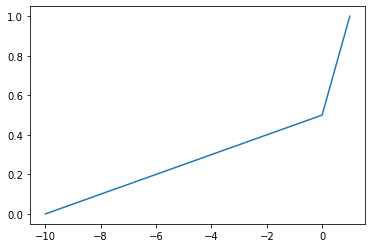

In [8]:
plt.plot(x,f)

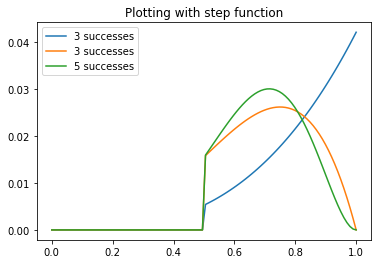

In [11]:
# 2M2. Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when p ≥ 0.5. 
# Again compute and plot the grid approximate posterior distribution for each of the sets of observations 
# in the problem just above.

for k,n,i in zip(W,N,range(3)):
    p = np.linspace(start = 0, stop = 1, num = 100)
    likelihood = stats.binom.pmf(k = k, n = n, p = p)
    prior = np.heaviside(p-0.5,0.5)*2 # all values < 0.5 become negative, 0.5 -> 0, >0.5 -> positive 1 x 2
    posterior = prior * likelihood
    posterior /= np.sum(posterior)
    plt.plot(p, posterior, label=str(k) + " successes")

plt.title('Plotting with step function')
plt.xlabel = "Paramter value - p"
plt.ylabel = "Prosterior probability"
plt.legend()
plt.show()

2M3. Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered in water. The Mars globe is 100% land. Further suppose that one of these globes—you don’t know which—was tossed in the air and produced a “land” observation. Assume that each globe was equally likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on seeing “land” (Pr(Earth|land)), is 0.23.

#### Analytical solution using Bayes rule

Think of the tree diagram for this:

You could throw: 
- E : 0.5 that could give W 0.7 or L 0.3
- M : 0.5 that could give W 0.0 or L 1.0

P(E|L) = p(L|E) x p(E) / p(L)

where

p(L) = p(L|E) x p(E) + p(L|M) x p(M)

since p(E) = p(L) = 0.5

the calculation simplifies to:

p(E|L) = p (L|E) / P(L|E) + p(L|M) = 0.3 / 0.3 + 1.0 = 0.3 / 1.3 ~ 0.23

2M4. Suppose you have a deck with only three cards. Each card has two sides, and each side is either black or white. One card has two black sides. The second card has one black and one white side. The third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up, but you don’t know the color of the side facing down. Show that the probability that the other side is also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This means counting up the ways that each card could produce the observed data (a black side facing up on the table).

#### Ans:

The cards are BB, BW, WW

Card num_ways Ways / Total(0+1+2)

BB	2	2/3

BW	1	1/3

WW	0	0/3

2M5. Now suppose there are four cards: B/B, B/W, W/W, and another B/B. Again suppose a card is drawn from the bag and a black side appears face up. Again calculate the probability that the other side is black.

#### Ans:

The cards are BB, BB, BW, WW

Card num_ways Ways / Total(0+1+2)

BB	2	2/5
            both 4/5
BB  2   2/5

BW	1	1/5

WW	0	0/5

If you already picked black, the other side will be black if both sides are black and that's 4/5

or 4/5 x 1 (pr other side black with BB) + 1/5 x 0 (prob other side black with BW)

2M6. Imagine that black ink is heavy,and so cards with black sides are heavier than cards with white sides. As a result, it’s less likely that a card with black sides is pulled from the bag. So again assume there are three cards: B/B, B/W, and W/W. After experimenting a number of times, you conclude that for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that the probability the other side is black is now 0.5. Use the counting method, as before.

Ans: probability of 2nd B, is same as prob of BB given we've already seen 1st B and BB : BW : WW have ratio 1:2:3

Could be formulated as follows

conjecture    ways to produce 1st B.   Prior Ratios   

BB                   2         x           1

BW                   1         x           2 

WW                   0         x           3

That gives 2 : 2 : 0

BB : BW 1:1 or 50/50 chance


Also, in Bayes

We want 

P(BB | B) = P(B|BB) x P(BB) / P(B)

P(B) = P(B|BB) x P(BB) + P(B|BW) x P(BW) + P(B|WW) x P(WW)

= 1 x 1/6 + 1/2 x 2/6 + 0 x 3/6 = 2/6


So, now P(BB | B) = 1/6 / 2/6 = 1/2

2M7. Assume again the original card problem,with a single card showing a black side face up.Before looking at the other side, we draw another card from the bag and lay it face up on the table. The face that is shown on the new card is white. Show that the probability that the first card, the one showing a black side, has black on its other side is now 0.75. Use the counting method, if you can. 

Hint: Treat this like the sequence of globe tosses, counting all the ways to see each observation, for each possible first card.

Ans: using the counting method as suggested

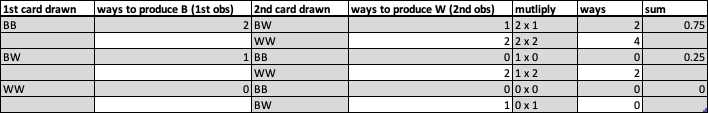

2H1. Suppose there are two species of panda bear. Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research.
Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?

2H2. Recall all the facts from the problem above. Now compute the probability that the panda we have is from species A, assuming we have observed only the first birth and that it was twins.

2H3. Continuingonfromthepreviousproblem,supposethesamepandamotherhasasecondbirth and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is species A.

2H4. A common boast of Bayesian statisticians is that Bayesian inference makes it easy to use all of the data, even if the data are of different types.
So suppose now that a veterinarian comes along who has a new genetic test that she claims can identify the species of our mother panda. But the test, like all tests, is imperfect. This is the informa- tion you have about the test:
• TheprobabilityitcorrectlyidentifiesaspeciesApandais0.8. • TheprobabilityitcorrectlyidentifiesaspeciesBpandais0.65.
The vet administers the test to your panda and tells you that the test is positive for species A. First ignore your previous information from the births and compute the posterior probability that your panda is species A. Then redo your calculation, now using the birth data as well.